In [119]:
import pandas as pd
import seaborn as sns

In [120]:
df = sns.load_dataset("planets")
print(df)

               method  number  orbital_period   mass  distance  year
0     Radial Velocity       1      269.300000   7.10     77.40  2006
1     Radial Velocity       1      874.774000   2.21     56.95  2008
2     Radial Velocity       1      763.000000   2.60     19.84  2011
3     Radial Velocity       1      326.030000  19.40    110.62  2007
4     Radial Velocity       1      516.220000  10.50    119.47  2009
...               ...     ...             ...    ...       ...   ...
1030          Transit       1        3.941507    NaN    172.00  2006
1031          Transit       1        2.615864    NaN    148.00  2007
1032          Transit       1        3.191524    NaN    174.00  2007
1033          Transit       1        4.125083    NaN    293.00  2008
1034          Transit       1        4.187757    NaN    260.00  2008

[1035 rows x 6 columns]


In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1035 entries, 0 to 1034
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   method          1035 non-null   object 
 1   number          1035 non-null   int64  
 2   orbital_period  992 non-null    float64
 3   mass            513 non-null    float64
 4   distance        808 non-null    float64
 5   year            1035 non-null   int64  
dtypes: float64(3), int64(2), object(1)
memory usage: 48.6+ KB


In [122]:
df.describe()

,number,orbital_period,mass,distance,year
count,1035.000000,992.000000,513.000000,808.000000,1035.000000
mean,1.785507,2002.917596,2.638161,264.069282,2009.070531
std,1.240976,26014.728304,3.818617,733.116493,3.972567
min,1.000000,0.090706,0.003600,1.350000,1989.000000
25%,1.000000,5.442540,0.229000,32.560000,2007.000000
50%,1.000000,39.979500,1.260000,55.250000,2010.000000
75%,2.000000,526.005000,3.040000,178.500000,2012.000000
max,7.000000,730000.000000,25.000000,8500.000000,2014.000000


In [123]:
df.duplicated().sum()

4

In [124]:
df = df.drop_duplicates()
df

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300000,7.10,77.40,2006
1,Radial Velocity,1,874.774000,2.21,56.95,2008
2,Radial Velocity,1,763.000000,2.60,19.84,2011
3,Radial Velocity,1,326.030000,19.40,110.62,2007
4,Radial Velocity,1,516.220000,10.50,119.47,2009
...,...,...,...,...,...,...
1030,Transit,1,3.941507,NaN,172.00,2006
1031,Transit,1,2.615864,NaN,148.00,2007
1032,Transit,1,3.191524,NaN,174.00,2007
1033,Transit,1,4.125083,NaN,293.00,2008


In [125]:
df.duplicated().sum()

0

In [126]:
df.isnull().sum().sum()

781

In [127]:
df.isnull().sum()

method              0
number              0
orbital_period     39
mass              518
distance          224
year                0
dtype: int64

In [128]:
df["orbital_period"]=df["orbital_period"].fillna(df["orbital_period"].median())

In [129]:
df.isnull().sum()

method              0
number              0
orbital_period      0
mass              518
distance          224
year                0
dtype: int64

In [130]:
df["mass"]=df["mass"].fillna(df["mass"].mean())

In [131]:
df.isnull().sum()

method              0
number              0
orbital_period      0
mass                0
distance          224
year                0
dtype: int64

In [132]:
df["distance"]=df["distance"].fillna(df["distance"].median())

In [133]:
df.isnull().sum().sum()

0

In [134]:
df

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300000,7.100000,77.40,2006
1,Radial Velocity,1,874.774000,2.210000,56.95,2008
2,Radial Velocity,1,763.000000,2.600000,19.84,2011
3,Radial Velocity,1,326.030000,19.400000,110.62,2007
4,Radial Velocity,1,516.220000,10.500000,119.47,2009
...,...,...,...,...,...,...
1030,Transit,1,3.941507,2.638161,172.00,2006
1031,Transit,1,2.615864,2.638161,148.00,2007
1032,Transit,1,3.191524,2.638161,174.00,2007
1033,Transit,1,4.125083,2.638161,293.00,2008


In [135]:
 import matplotlib.pyplot as plt

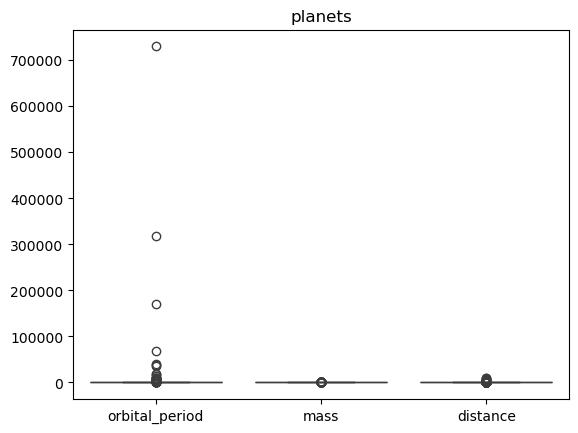

In [136]:
sns.boxplot(data = df[["orbital_period","mass","distance"]])
plt.title("planets")
plt.show()

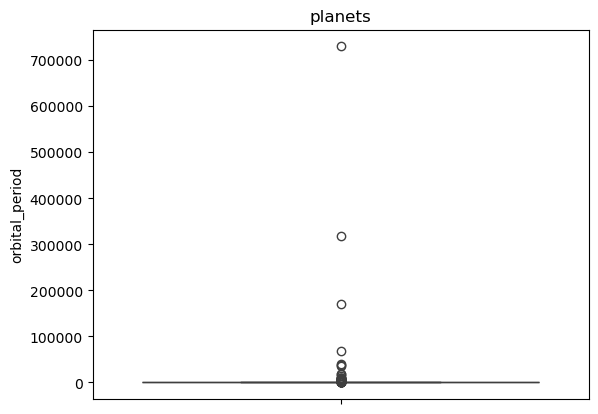

In [137]:
sns.boxplot(data=df["orbital_period"])
plt.title("planets")
plt.show()

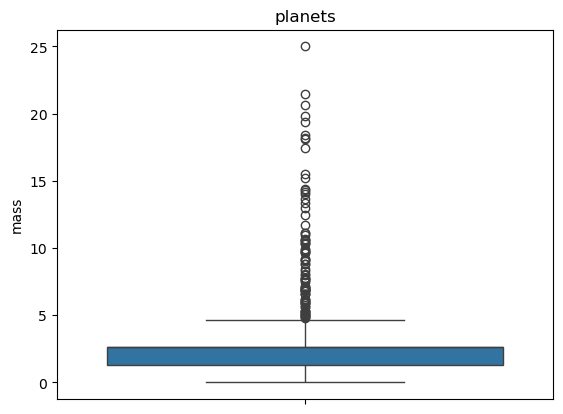

In [138]:
sns.boxplot(data = df["mass"])
plt.title("planets")
plt.show()

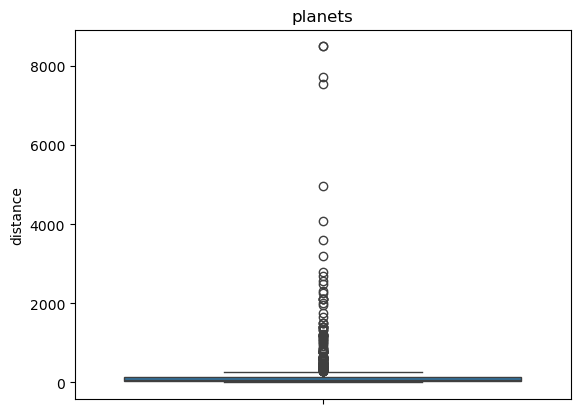

In [139]:
sns.boxplot(data = df["distance"])
plt.title("planets")
plt.show()

In [140]:
from scipy import stats
import numpy as np

#Calculate Z-scores
z_scores_orbital_period = np.abs(stats.zscore(df['orbital_period']))
z_scores_mass = np.abs(stats.zscore(df['mass']))
z_scores_distance = np.abs(stats.zscore(df['distance']))

#Filter out rows with Z-scores greater than 3
mask = (z_scores_orbital_period < 3) & (z_scores_mass < 3) & (z_scores_distance < 3)

df = df[mask]
df

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300000,7.100000,77.40,2006
1,Radial Velocity,1,874.774000,2.210000,56.95,2008
2,Radial Velocity,1,763.000000,2.600000,19.84,2011
4,Radial Velocity,1,516.220000,10.500000,119.47,2009
5,Radial Velocity,1,185.840000,4.800000,76.39,2008
...,...,...,...,...,...,...
1030,Transit,1,3.941507,2.638161,172.00,2006
1031,Transit,1,2.615864,2.638161,148.00,2007
1032,Transit,1,3.191524,2.638161,174.00,2007
1033,Transit,1,4.125083,2.638161,293.00,2008


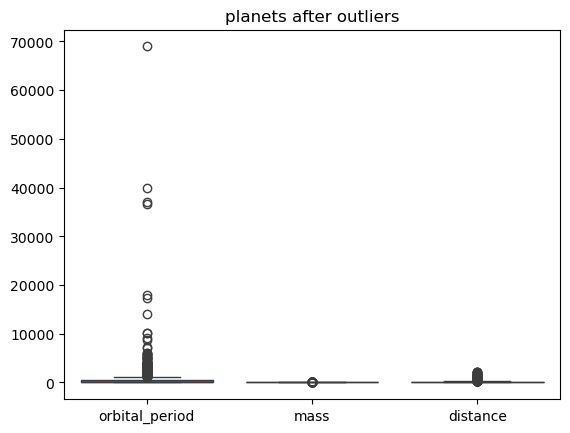

In [141]:
sns.boxplot(data = df[["orbital_period","mass","distance"]])
plt.title("planets after outliers")
plt.show()

In [142]:
Q1=df[['orbital_period','mass','distance']].quantile(0.25)
Q3=df[['orbital_period','mass','distance']].quantile(0.75)
IQR = Q3-Q1
lb = Q1 - 1.5*IQR
ub = Q3 + 1.5*IQR
#df = df[(df['orbital_period','mass','distance']>=lb) & (df['orbital_period','mass','distance']<= ub)]
mask = ((df['orbital_period'] >= lb['orbital_period']) & 
         (df['orbital_period'] <= ub['orbital_period'])) & \
       ((df['mass'] >= lb['mass']) & 
        (df['mass'] <= ub['mass'])) & \
       ((df['distance'] >= lb['distance']) & 
        (df['distance'] <= ub['distance']))

df = df[mask]
df



,method,number,orbital_period,mass,distance,year
1,Radial Velocity,1,874.774000,2.210000,56.95,2008
2,Radial Velocity,1,763.000000,2.600000,19.84,2011
7,Radial Velocity,1,798.500000,2.638161,21.41,1996
9,Radial Velocity,2,452.800000,1.990000,74.79,2010
10,Radial Velocity,2,883.000000,0.860000,74.79,2010
...,...,...,...,...,...,...
1027,Imaging,1,39.979500,2.638161,19.20,2011
1029,Imaging,1,39.979500,2.638161,10.10,2012
1030,Transit,1,3.941507,2.638161,172.00,2006
1031,Transit,1,2.615864,2.638161,148.00,2007


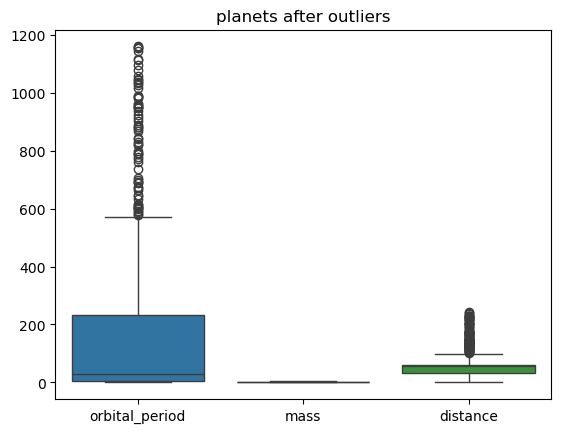

In [143]:
sns.boxplot(data = df[["orbital_period","mass","distance"]])
plt.title("planets after outliers")
plt.show()